In [30]:
import pandas as pd
import numpy as np
import pyarrow
import time

In [31]:
bytes_list=[1000000]
# bytes_list=list(range(100,10000000,10000)) ## Customize this as per your RAM capabilities
# On my machine, 1000000 bytes produces a csv file of 0.2GB

In [32]:
def random_dates(start, end, n, unit='D', seed=0):
    
    np.random.seed(seed)

    ndays = (end - start).days + 1
    return pd.to_timedelta(np.random.rand(n) * ndays, unit=unit) + start

In [33]:
for byte_size in bytes_list:
    data_list=[['Nic','Wilson',70,'Boston',True,'A1',87.8],['John','Barman',40,'Cambridge',False,'B2',98.8],['Maryam','Wagner',50,'Edison',True,'C4',30],
            ['Melissa','Johnson',2,'Saratoga',True,'A3',67.4],['Trisha','Ellis',30,'Medway',False,'D5',77.3],['Mike','Hiltz',35,'Brighton',False,'D1',80]]
    df=pd.DataFrame(data_list, columns=['First Name','Last Name','Age','City','Employed','Room Number','Marks'])
    np.random.seed(0)
    start = pd.to_datetime('2011-01-01')
    end = pd.to_datetime('2022-01-01')

    df=df.append([df]*byte_size,ignore_index=True)
    df['Birth Date']=pd.to_datetime(random_dates(start, end, len(df)).date)
    display(df)
    print(df.dtypes)


/var/folders/72/97qs6j1x3zz6rcbjy0646r6h0000gp/T/ipykernel_33017/3379492515.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append([df]*byte_size,ignore_index=True)


,First Name,Last Name,Age,City,Employed,Room Number,Marks,Birth Date
0,Nic,Wilson,70,Boston,True,A1,87.8,2017-01-14
1,John,Barman,40,Cambridge,False,B2,98.8,2018-11-14
2,Maryam,Wagner,50,Edison,True,C4,30.0,2017-08-19
3,Melissa,Johnson,2,Saratoga,True,A3,67.4,2016-12-29
4,Trisha,Ellis,30,Medway,False,D5,77.3,2015-08-30
...,...,...,...,...,...,...,...,...
6000001,John,Barman,40,Cambridge,False,B2,98.8,2018-12-21
6000002,Maryam,Wagner,50,Edison,True,C4,30.0,2016-02-04
6000003,Melissa,Johnson,2,Saratoga,True,A3,67.4,2015-04-22
6000004,Trisha,Ellis,30,Medway,False,D5,77.3,2018-11-29


First Name             object
Last Name              object
Age                     int64
City                   object
Employed                 bool
Room Number            object
Marks                 float64
Birth Date     datetime64[ns]
dtype: object


In [34]:
start=time.time()
df.to_csv('try_1.csv',index=False)
end=time.time()
time_taken_csv=end-start
print(time_taken_csv)


11.639415979385376


In [35]:

start=time.time()
df.to_json('try_2.json', orient='records')

end=time.time()
time_taken_json=end-start
print(time_taken_json)



3.459484100341797


In [36]:

start=time.time()
df.to_parquet('try_3.parquet', engine='pyarrow')
end=time.time()
time_taken_parquet=end-start
print(time_taken_parquet)



1.2742910385131836


In [37]:
from pathlib import Path
  
size_csv = Path('try_1.csv').stat().st_size
size_json = Path('try_2.json').stat().st_size
size_parquet = Path('try_3.parquet').stat().st_size
  
print(size_csv)
print(size_json)
print(size_parquet)

290000358
872000873
9724364


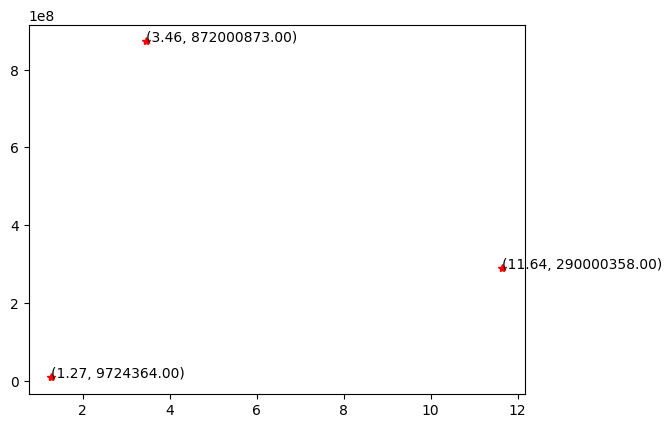

In [45]:
import datetime
import random
import matplotlib.pyplot as plt

# make up some data
x = [time_taken_csv,time_taken_json,time_taken_parquet]
y = [size_csv,size_json,size_parquet]
labels=['csv','json','parquet']

# plot
plt.plot(x,y,'r*')
for xy in zip(x,y):
   plt.annotate('(%.2f, %.2f)' % xy, xy=xy)
# beautify the x-labels
#plt.gcf().autofmt_xdate()

plt.show()